# Task-2: Prediction using Unsupervised Machine Learning

# Author - Shamika Pradhan

<h2>Importing libraries:</h2>

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Loading Iris dataset

In [2]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

# Reading the dataset

In [3]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
iris_df.shape

(150, 4)

In [5]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [7]:
iris_df.drop_duplicates(inplace=True)

# Elbow Method to estimate the number of K 

c:\users\shamika\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


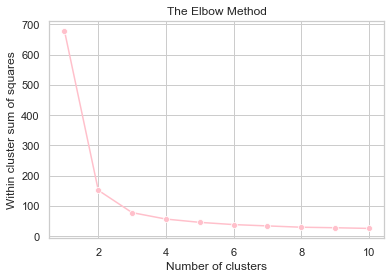

In [8]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
sns.set(style='whitegrid')
sns.lineplot(range(1, 11), wcss,marker='o',color='pink')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of squares')
plt.show()

>>The optimum value for K would be 3. As we can see that with an increase in the number of clusters the WCSS value decreases. We select the value for K on the basis of the rate of decrease in WCSS and we can see that after 3 the drop in wcss is minimal.

In [9]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1])

In [10]:
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.118129,0.873738,0.820620
sepal width (cm),-0.118129,1.000000,-0.426028,-0.362894
petal length (cm),0.873738,-0.426028,1.000000,0.962772
petal width (cm),0.820620,-0.362894,0.962772,1.000000


### Data Visualization

<AxesSubplot:>

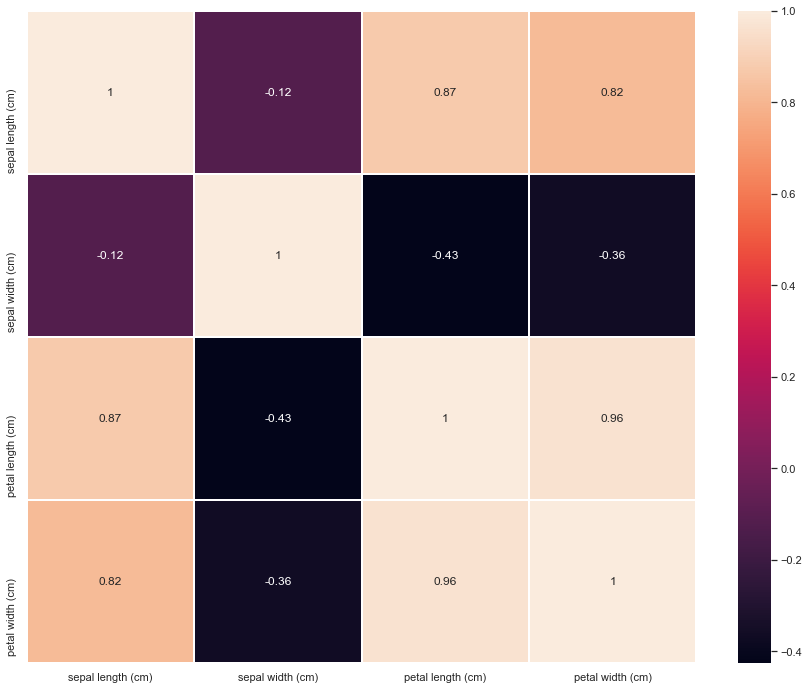

In [11]:
fig=plt.figure(figsize=(15,12))
sns.heatmap(iris_df.corr(),linewidths=1,annot=True)

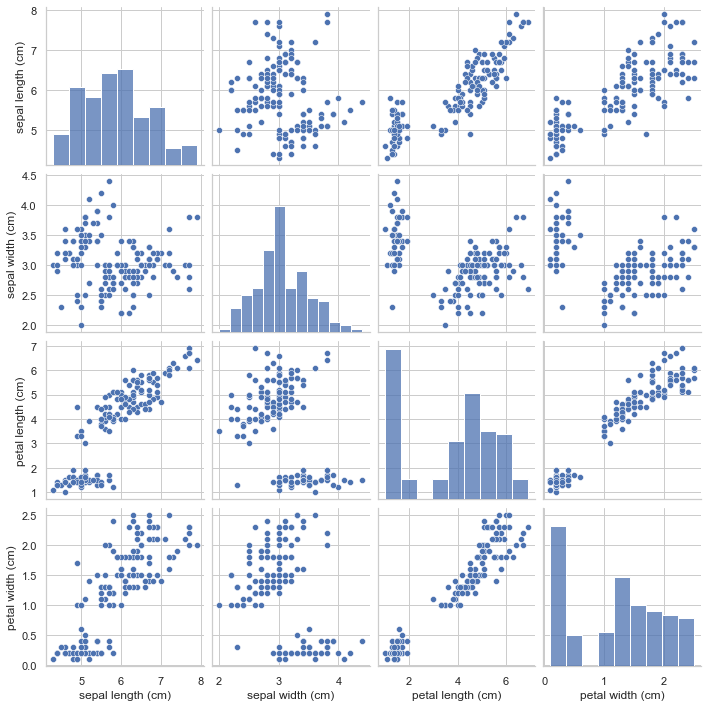

In [12]:
sns.pairplot(iris_df)


 We can see that Species depend on Petal Length and Petal Width.

In [13]:
iris_df=iris_df.iloc[:,[0,1,2,3]].values

### Initialization using K-means++

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 5)
y_kmeans = kmeans.fit_predict(iris_df)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0])

### Visualizing the Clusters 

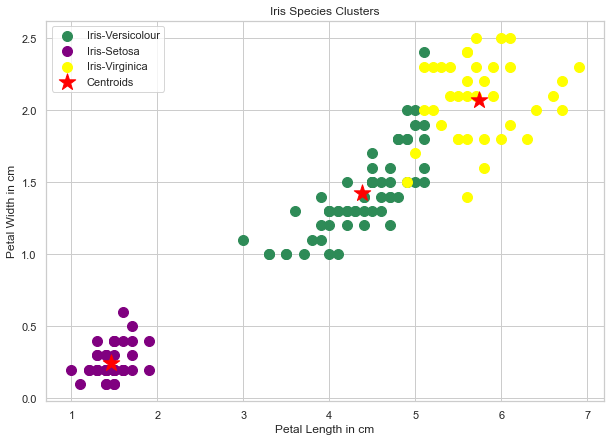

In [15]:
fig = plt.figure(figsize=(10, 7))
plt.title('Clusters with Centroids',fontweight ='bold', fontsize=20)
plt.scatter(iris_df[y_kmeans == 0, 2], iris_df[y_kmeans == 0, 3], s = 100, c = 'seagreen', label = 'Iris-Versicolour')
plt.scatter(iris_df[y_kmeans == 1, 2], iris_df[y_kmeans == 1, 3], s = 100, c = 'purple', label = 'Iris-Setosa')
plt.scatter(iris_df[y_kmeans == 2, 2], iris_df[y_kmeans == 2, 3],s = 100, c = 'yellow', label = 'Iris-Virginica')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 300, c = 'red',marker='*', 
            label = 'Centroids')
plt.title('Iris Species Clusters')
plt.ylabel('Petal Width in cm')
plt.xlabel('Petal Length in cm')
plt.legend()